##Import Libraries


In [ ]:

%matplotlib inline

from google.colab import files    # upload
import numpy as np                # mathematical calculations
from io import BytesIO            # reading files
from PIL import Image             # image processing library
import matplotlib.pyplot as plt   # plotting library
from mpl_toolkits import mplot3d  # 3D plots
import cv2 as cv2

import time
from IPython import display
import random

In [6]:
uploaded = files.upload()
im = Image.open(BytesIO(uploaded['WIN_20211008_18_47_34_Pro.jpg']))

Saving WIN_20211008_18_47_34_Pro.jpg to WIN_20211008_18_47_34_Pro (2).jpg


In [7]:
rgb = np.array(im)

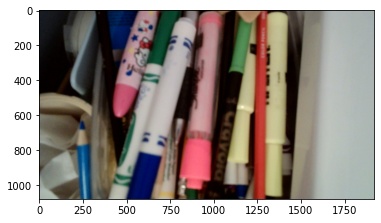

In [8]:
plt.imshow(rgb)
plt.show()

(1080, 850, 3)


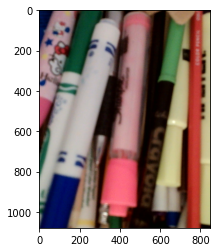

In [27]:
crop = rgb[0:1800, 500:1350, :]
plt.imshow(crop)
print(crop.shape)

In [28]:
def distanceL(pt1, pt2):
  return np.sqrt(np.square(pt1[0]-pt2[0]) + np.square(pt1[1]-pt2[1]) + np.square(pt1[2]-pt2[2]))
def assign(centres, image):
  d = {}
  for a, b in centres.items():
    d[a] = []
  x, y, e = crop.shape
  for a in range(x):
    for b in range(y):
      minD = 15324354566485625452615413254367485
      min2 = None
      for i, j in centres.items():
        if distanceL(j, image[a, b, :]) < minD:
          minD = distanceL(j, image[a, b, :])
          min2 = i
      d[min2].append([a, b])
    
  return d
def new_centroidL(pixels, image):
  r = 0
  g = 0
  b = 0
  l = len(pixels)
  if l == 0:
    return list([random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)])
  for i in pixels:
    r1 = image[i[0], i[1], 0] 
    g1 = image[i[0], i[1], 1]
    b1 = image[i[0], i[1], 2]
    r += r1
    g += g1
    b += b1
  return r//l, g//l, b//l
def error(im1, im2):
  rdif = im1[:, :, 0] - im2[:, :, 0]
  gdif = im1[:, :, 1] - im2[:, :, 1]
  bdif = im1[:, :, 2] - im2[:, :, 2]
  e = np.sqrt(np.square(rdif) + np.square(gdif) + np.square(bdif))
  e = e.astype(np.float32)
  e = e/e.max()
  w = e.shape[0]
  h = e.shape[1]
  return np.sum(e)/(w*h)

In [29]:
def im2plot(image, centroids, clusters):
  im = image.copy()
  for a, b in clusters.items():
    colour = centroids[a]
    for i in b:
      im[i[0], i[1], 0] = colour[0]
      im[i[0], i[1], 1] = colour[1]
      im[i[0], i[1], 2] = colour[2]
  return im


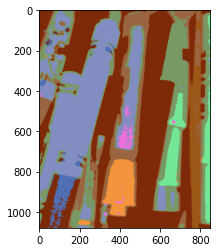

In [30]:
k = 12
max_itr = 8
randR = np.random.uniform(low = 0, high = 1, size = k) * 255
randG = np.random.uniform(low = 0, high = 1, size = k) * 255
randB = np.random.uniform(low = 0, high = 1, size = k) * 255
centres = {ind: [int(randR[ind]), int(randG[ind]), int(randB[ind])] for ind in range(k)}
clusters = assign(centres, crop)
plt.imshow(im2plot(crop, centres, clusters))


In [31]:

errorlog = {}
itr = 0
while itr < max_itr:
  clusters = assign(centres, crop)
  try:
    im = im2plot(crop, centres, clusters)
    errorlog[itr] = error(crop, im)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[8, 5])
    ax1.set_title('Original')
    ax2.set_title("K-Means Iteration %d" % itr)
    im1 = ax1.imshow(crop, cmap="gray")
    im2 = ax2.imshow(im, cmap="gray")
    ax1.axis('off')
    ax2.axis('off')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    time.sleep(0.1)
    plt.close()
  except KeyboardInterrupt:
    break
  centres = {}
  for i in range(k):
    centres[i] = new_centroidL(clusters[i], crop)
  itr += 1

KeyboardInterrupt: ignored

In [17]:
centres

{0: (186, 192, 185),
 1: (4, 31, 95),
 2: (73, 66, 50),
 3: (107, 103, 86),
 4: (171, 181, 175),
 5: (145, 137, 118),
 6: (26, 10, 5),
 7: (183, 172, 132),
 8: (243, 98, 119),
 9: (186, 56, 48),
 10: (202, 198, 144),
 11: (130, 41, 22)}

In [18]:
errorlog

{0: 0.6697559730679381,
 1: 0.662533255184398,
 2: 0.6709917105880439,
 3: 0.6224600100049785,
 4: 0.6155234692143459,
 5: 0.6272081861308977,
 6: 0.6201250038894952,
 7: 0.6084575279086244}

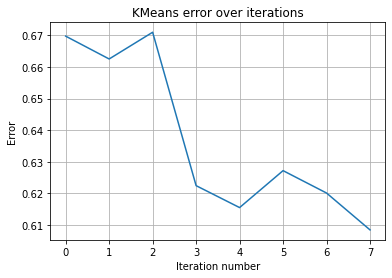

In [19]:
plt.plot(list(errorlog.keys()), list(errorlog.values()))
plt.title("KMeans error over iterations")
plt.xlabel("Iteration number")
plt.ylabel("Error")
plt.grid('on')
plt.show()

In [20]:
new_colour = [106, 81, 228]

In [21]:
def alter_single_centroid(image, centroid, clusters, new_colour):
  new_im = im.copy()
  for i in clusters[centroid]:
    new_im[i[0], i[1], 0] = new_colour[0]
    new_im[i[0], i[1], 1] = new_colour[1]
    new_im[i[0], i[1], 2] = new_colour[2]
  return new_im


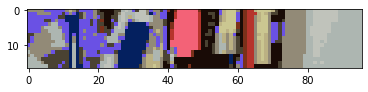

In [22]:
new_im = alter_single_centroid(crop, 3, clusters, new_colour)
plt.imshow(new_im)

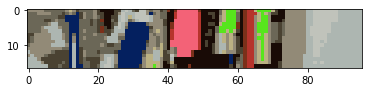

In [23]:
new_colour = [87, 229, 29]
new_im = alter_single_centroid(crop, 10, clusters, new_colour)
plt.imshow(new_im)

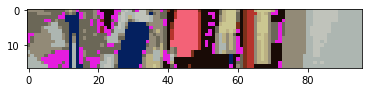

In [24]:
new_colour = [229, 29, 223]
new_im = alter_single_centroid(crop, 2, clusters, new_colour)
plt.imshow(new_im)

In [25]:
def greyscale(image):
  grey = (0.3 * im[:, :, 0]) + (0.59 * im[:, :, 1]) + (0.11 * im[:, :, 2])
  grey = grey*255/grey.max()
  return grey.astype(np.uint8)

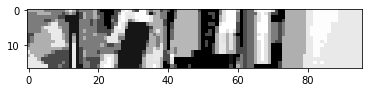

In [26]:
g = greyscale(im)
plt.imshow(g, cmap = 'gray')